## Exercícios

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2] em qualquer dataset que você desejar (recomendação: iris). Compare os resultados utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].

* [1] http://scikit-learn.org/stable/modules/clustering.html#k-means

* [2] http://scikit-learn.org/0.17/modules/clustering.html#hierarchical-clustering

* [3] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

2 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 

* Ajuda: atributos do [k-means](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

3 - Após a questão 2, você aplicou o algoritmo com K apropriado. Refaça o cálculo das métricas de acordo com os resultados de clusters obtidos com a questão anterior e verifique se o resultado melhorou.


### Aluno: Marcos Felipe de Menezes Mota - 354080

In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.decomposition import PCA
import pandas as pd

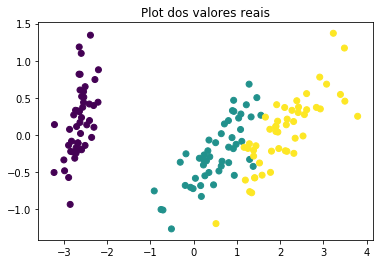

In [2]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

data2d = PCA(n_components=2).fit_transform(X)
data2d_df = pd.DataFrame(data2d)
data2d_df[2] = y
plt.scatter(data2d_df[0], data2d_df[1], c=data2d_df[2])
plt.title("Plot dos valores reais")
plt.show()

In [3]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
ypred_kmeans = kmeans.predict(X)

ypred_agg = AgglomerativeClustering(n_clusters=3, affinity="euclidean").fit_predict(X)

In [4]:
metrics_kmeans = metrics.homogeneity_completeness_v_measure(y, ypred_kmeans)
print("Metricas homogeneity, completeness e v measure respectivamente para o Kmeans, k=3 \n", metrics_kmeans)

Metricas homogeneity, completeness e v measure respectivamente para o Kmeans, k=3 
 (0.75148540219883386, 0.76498615144898163, 0.75817568000577862)


In [5]:
metrics_agg = metrics.homogeneity_completeness_v_measure(y, ypred_agg)
print("Metricas homogeneity, completeness e v measure respectivamente para o Cluster Aglomerativo \n", metrics_agg)

Metricas homogeneity, completeness e v measure respectivamente para o Cluster Aglomerativo 
 (0.76080084697187234, 0.77959580055911437, 0.77008366164878694)


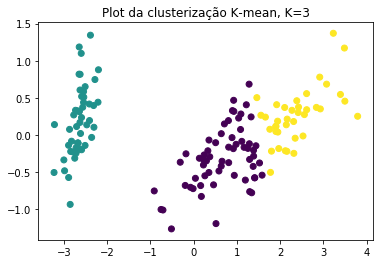

In [6]:
data2d = PCA(n_components=2).fit_transform(X)
data2d_df = pd.DataFrame(data2d)
data2d_df[2] = ypred_kmeans
plt.scatter(data2d_df[0], data2d_df[1], c=data2d_df[2])
plt.title("Plot da clusterização K-mean, K=3")
plt.show()

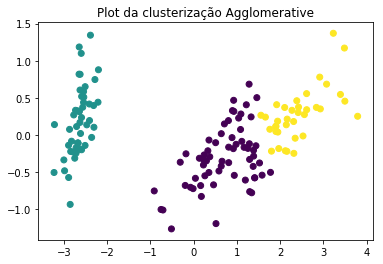

In [7]:
data2d_df[2] = ypred_agg
plt.scatter(data2d_df[0], data2d_df[1], c=data2d_df[2])
plt.title("Plot da clusterização Agglomerative")
plt.show()

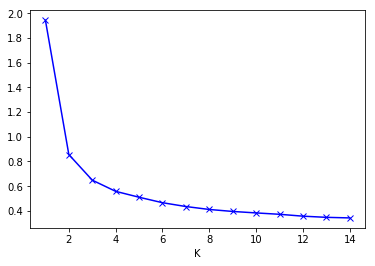

In [11]:
#metodo do cotovelo para escolha de K
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.show()

Metricas homogeneity, completeness e v measure respectivamente para o KMeans, k=4 
 (0.80831384236370951, 0.65221133555143129, 0.72192038678209602)


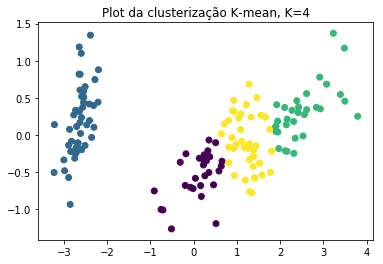

In [9]:
#Pelo grafico o melhor K seria K=4 logo temos o plot e metricas para esse K
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
ypred_kmeans = kmeans.predict(X)
metrics_kmeans = metrics.homogeneity_completeness_v_measure(y, ypred_kmeans)
print("Metricas homogeneity, completeness e v measure respectivamente para o KMeans, k=4 \n", metrics_kmeans)
data2d = PCA(n_components=2).fit_transform(X)
data2d_df = pd.DataFrame(data2d)
data2d_df[2] = ypred_kmeans
plt.scatter(data2d_df[0], data2d_df[1], c=data2d_df[2])
plt.title("Plot da clusterização K-mean, K=4")
plt.show()

### Usando K=4 vemos que a metrica de homogenidade melhorou e a v-measure ficou quase igual. No entanto a metrica de completude ficou um pouco abaixo para o valor inicial de K=3